In [6]:
!git clone https://github.com/microsoft/CodeXGLUE.git

Cloning into 'CodeXGLUE'...
remote: Enumerating objects: 3373, done.
remote: Counting objects: 100% (3372/3372), done.
remote: Compressing objects: 100% (1534/1534), done.
remote: Total 3373 (delta 1748), reused 3326 (delta 1733), pack-reused 1 (from 1)
Receiving objects: 100% (3373/3373), 213.15 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (400/400), done.


In [7]:
import os


In [8]:
!pip install gdown

In [9]:
import gdown

# URL for the file you want to download
url = 'https://drive.google.com/uc?id=0B2i-vWnOu7MxVlJwQXN6eVNONUU'
output = 'downloaded_file.zip'  # Specify the output file name

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=0B2i-vWnOu7MxVlJwQXN6eVNONUU
From (redirected): https://drive.google.com/uc?id=0B2i-vWnOu7MxVlJwQXN6eVNONUU&confirm=t&uuid=6d57ba89-b92f-4fe5-820f-fe26c785b36b
To: /content/downloaded_file.zip
100%|██████████| 8.66M/8.66M [00:00<00:00, 77.7MB/s]


'downloaded_file.zip'

In [10]:
import tarfile

# Specify the path to your tar.gz file
tar_file_path = 'downloaded_file.zip'
# Open the tar.gz file
with tarfile.open(tar_file_path, 'r:gz') as tar:
    # Extract all contents to the current directory
    tar.extractall()

print("Extraction completed!")


Extraction completed!


In [11]:
os.chdir('/content/CodeXGLUE/Code-Code/Clone-detection-POJ-104/dataset')

In [12]:
import os
import json
from tqdm import tqdm
import pandas as pd

# Function to recursively list files
def files(path):
    file = []
    for root, dirs, files in os.walk(path):
        for file_name in files:
            file.append(os.path.join(root, file_name))
    return file

# Writing JSONL from list of files
def write_jsonl(file_range, start_index, input_dir, output_file):
    cont = start_index
    with open(output_file, 'w', encoding='utf-8') as f:
        for i in tqdm(file_range, total=len(file_range)):
            items = files(os.path.join(input_dir, str(i)))
            for item in items:
                js = {}
                js['label'] = item.split('/')[-1]  # Use '/' for Unix-like path
                js['index'] = str(cont)
                with open(item, 'r', encoding='latin-1') as code_file:
                    js['code'] = code_file.read()
                f.write(json.dumps(js) + '\n')
                cont += 1

# Define directories and file names
input_dir = '/content/ProgramData'  # Adjust this path if your data is in Google Drive or elsewhere
train_output = 'train.jsonl'
valid_output = 'valid.jsonl'
test_output = 'test.jsonl'

# You might want to adjust these ranges based on your directory structure
train_range = range(1, 65)  # Assuming folders are numbered as in your original script
valid_range = range(65, 81)
test_range = range(81, 105)

# Writing out files
write_jsonl(train_range, 0, input_dir, train_output)
write_jsonl(valid_range, 40000, input_dir, valid_output)  # Example starting index, adjust as necessary
write_jsonl(test_range, 50000, input_dir, test_output)  # Example starting index, adjust as necessary


100%|██████████| 24/24 [00:00<00:00, 30.86it/s]


In [ ]:
import pandas as pd
import json

# Function to load data from a JSONL file into a DataFrame
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Load your datasets
train_df = load_data('/content/train.jsonl')
valid_df = load_data('/content/valid.jsonl')
test_df = load_data('/content/test.jsonl')


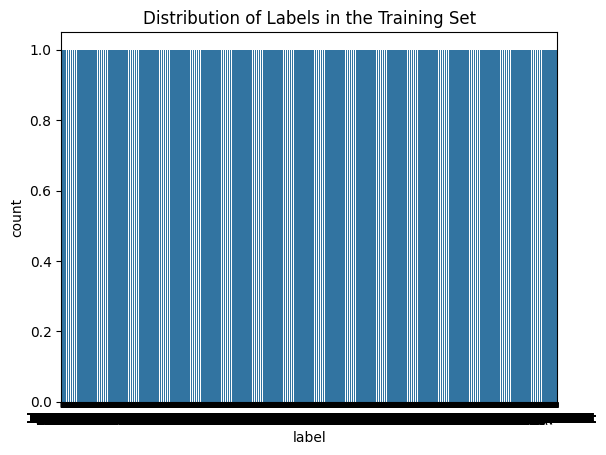

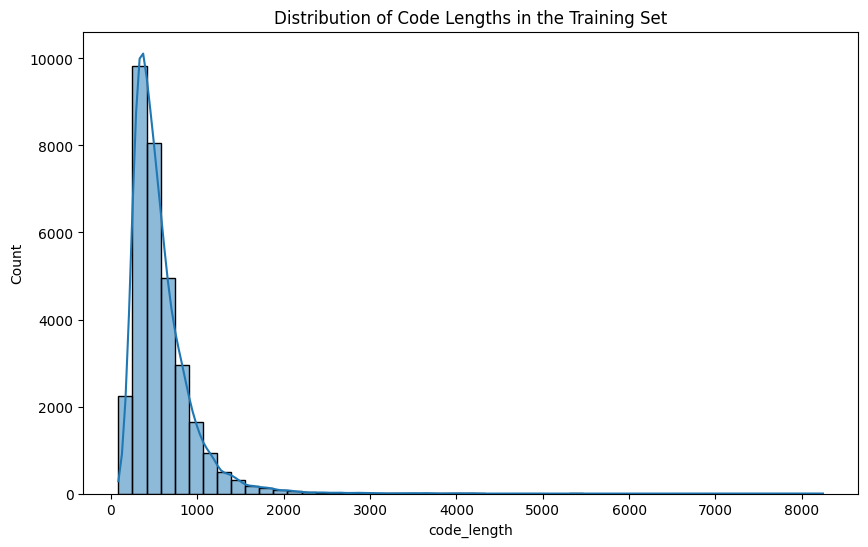

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of labels
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Labels in the Training Set')
plt.show()

# Histogram of code lengths
train_df['code_length'] = train_df['code'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['code_length'], bins=50, kde=True)
plt.title('Distribution of Code Lengths in the Training Set')
plt.show()


In [ ]:
import pandas as pd
import json

def load_jsonl(file_name):
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Assuming the files are named 'train.jsonl', 'valid.jsonl', and 'test.jsonl' after upload
train_df = load_jsonl('train.jsonl')
valid_df = load_jsonl('valid.jsonl')
test_df = load_jsonl('test.jsonl')

# Display basic information and the first few rows from the training data
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   32000 non-null  object
 1   index   32000 non-null  object
 2   code    32000 non-null  object
dtypes: object(3)
memory usage: 750.1+ KB


,label,index,code
0,1\1001.txt,0,"void main()\n{\n\tint n,a[100],i;\n\tvoid fen(..."
1,1\1002.txt,1,"int f(int a,int b)\n{\n\tint i,p,q;\n\tfor(i=b..."
2,1\1008.txt,2,/*\n?? - 1090 ???? \n \n?? \n???????a???????...
3,1\1018.txt,3,"int t;\nint f(int a,int b){\n\tint i;\n for..."
4,1\1020.txt,4,"int sum = 0;\nvoid f(int a,int s)\n{\n\tint i;..."


In [ ]:
import re

def clean_code(text):
    # Simple text cleaning process
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text

train_df['clean_code'] = train_df['code'].apply(clean_code)
valid_df['clean_code'] = valid_df['code'].apply(clean_code)
test_df['clean_code'] = test_df['code'].apply(clean_code)


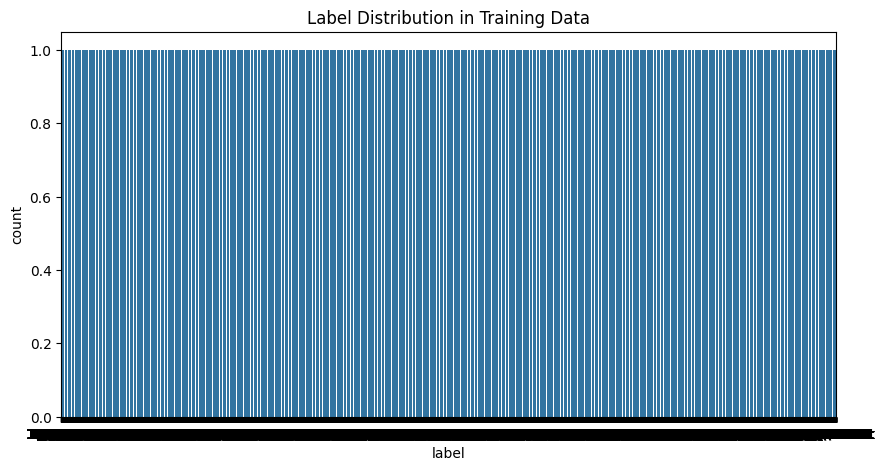

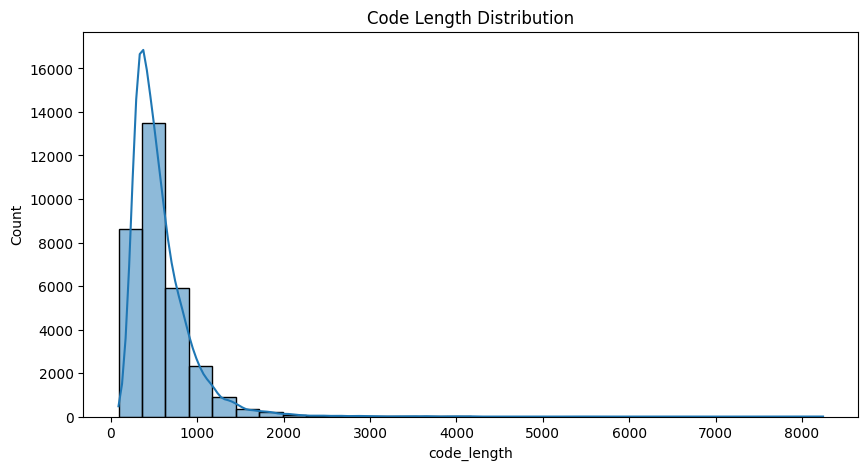

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='label')
plt.title('Label Distribution in Training Data')
plt.show()

# Code length distribution
train_df['code_length'] = train_df['code'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(train_df['code_length'], bins=30, kde=True)
plt.title('Code Length Distribution')
plt.show()
